# Import Libraries

In [78]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


from urlextract import URLExtract
import arabic_reshaper
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import emoji

In [79]:
f = open("_chat.txt", "r", encoding='utf-8')

In [80]:
data = f.read()

In [81]:
data

'[08/07/2019, 1:57:52 PM] اصحاب الدنيا و الجنة♥️🌍: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n[08/07/2019, 1:57:52 PM] \u200eMarwan Essam created this group\n[08/07/2019, 1:57:52 PM] \u200eYou were added\n[05/03/2020, 6:47:50 PM] Mazen Reda: Aywa mna m3rfsh hat3mloo ehh\n[05/03/2020, 6:53:24 PM] Andrew Hany: Ana gy ana w kikis\n[05/03/2020, 6:53:27 PM] Andrew Hany: W omar nabil\n[05/03/2020, 6:53:40 PM] Andrew Hany: W bo2la w besa el mafrod\n[05/03/2020, 7:02:04 PM] Andrew Hany: Ahh\n[05/03/2020, 7:02:09 PM] Andrew Hany: Elbso\n[05/03/2020, 7:02:10 PM] Andrew Hany: ELBSOOO\n[06/03/2020, 1:33:19 AM] Andrew Hany: Ahh\n[06/03/2020, 1:33:24 AM] Andrew Hany: Mn 10/12\n[06/03/2020, 1:33:36 AM] Andrew Hany: Gala2\n[06/03/2020, 1:35:09 AM] Andrew Hany: Y3m t3ala wenta saket\n[06/03/2020, 1:35:14 AM] Andrew Hany: Danta bdan awy\n\u200e[06/03/2020, 1:36:37 AM] Seif Tarek: \u200eimage omitted\n\u200e[06/03/2020, 

# Data Preprocessing and Analysis

**Pattern to Extract the date**

In [82]:
pattern = '\[\d{1,2}/\d{1,2}/\d{4},\s\d{1,2}:\d{1,2}:\d{1,2}\s\w{2}\]'

In [83]:
message = re.split(pattern, data)[1:]

In [84]:
messaged

[' اصحاب الدنيا و الجنة♥️🌍: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n',
 ' \u200eMarwan Essam created this group\n',
 ' \u200eYou were added\n',
 ' Mazen Reda: Aywa mna m3rfsh hat3mloo ehh\n',
 ' Andrew Hany: Ana gy ana w kikis\n',
 ' Andrew Hany: W omar nabil\n',
 ' Andrew Hany: W bo2la w besa el mafrod\n',
 ' Andrew Hany: Ahh\n',
 ' Andrew Hany: Elbso\n',
 ' Andrew Hany: ELBSOOO\n',
 ' Andrew Hany: Ahh\n',
 ' Andrew Hany: Mn 10/12\n',
 ' Andrew Hany: Gala2\n',
 ' Andrew Hany: Y3m t3ala wenta saket\n',
 ' Andrew Hany: Danta bdan awy\n\u200e',
 ' Seif Tarek: \u200eimage omitted\n\u200e',
 ' Seif Tarek: \u200eimage omitted\n\u200e',
 ' Seif Tarek: \u200eimage omitted\n\u200e',
 ' Seif Tarek: \u200eimage omitted\n\u200e',
 ' Seif Tarek: \u200eimage omitted\n\u200e',
 ' Seif Tarek: \u200eimage omitted\n\u200e',
 ' Seif Tarek: \u200eimage omitted\n\u200e',
 ' Seif Tarek: \u200eimage omitted\n\u200e',
 ' 

In [85]:
pattern = '\d{1,2}/\d{1,2}/\d{4},\s\d{1,2}:\d{1,2}:\d{1,2}\s\w{2}'

In [86]:
dates = re.findall(pattern, data)

In [87]:
dates

['08/07/2019, 1:57:52 PM',
 '08/07/2019, 1:57:52 PM',
 '08/07/2019, 1:57:52 PM',
 '05/03/2020, 6:47:50 PM',
 '05/03/2020, 6:53:24 PM',
 '05/03/2020, 6:53:27 PM',
 '05/03/2020, 6:53:40 PM',
 '05/03/2020, 7:02:04 PM',
 '05/03/2020, 7:02:09 PM',
 '05/03/2020, 7:02:10 PM',
 '06/03/2020, 1:33:19 AM',
 '06/03/2020, 1:33:24 AM',
 '06/03/2020, 1:33:36 AM',
 '06/03/2020, 1:35:09 AM',
 '06/03/2020, 1:35:14 AM',
 '06/03/2020, 1:36:37 AM',
 '06/03/2020, 1:36:41 AM',
 '06/03/2020, 1:36:42 AM',
 '06/03/2020, 1:36:43 AM',
 '06/03/2020, 1:36:43 AM',
 '06/03/2020, 1:36:43 AM',
 '06/03/2020, 1:36:44 AM',
 '06/03/2020, 1:36:44 AM',
 '06/03/2020, 1:36:44 AM',
 '06/03/2020, 1:36:45 AM',
 '06/03/2020, 1:36:45 AM',
 '06/03/2020, 1:36:45 AM',
 '06/03/2020, 1:36:46 AM',
 '06/03/2020, 1:36:46 AM',
 '06/03/2020, 1:37:32 AM',
 '06/03/2020, 2:22:19 AM',
 '06/03/2020, 2:29:32 AM',
 '06/03/2020, 9:17:46 AM',
 '06/03/2020, 12:08:06 PM',
 '06/03/2020, 2:04:54 PM',
 '06/03/2020, 2:04:57 PM',
 '06/03/2020, 2:05:04 PM',


In [88]:
df = pd.DataFrame({'user_message':message, 'message_date':dates})
df.tail()

,user_message,message_date
27968,Yehia Adel: Ana 5las 3mlt hsabk w hhgz\n,"18/06/2022, 4:45:38 PM"
27969,Yousef Akram: اللعب امتى يا جدعان حجزتو ؟\n,"18/06/2022, 5:04:30 PM"
27970,Yehia Adel: Ell3b mn 11 ya gd3an\n,"18/06/2022, 6:13:35 PM"
27971,Ahmed Waleed : فين\n,"18/06/2022, 6:17:40 PM"
27972,Seif Aiman: Men hytfrg 3l match\n,"19/06/2022, 6:17:07 PM"


In [89]:
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %I:%M:%S %p')

In [90]:
df.tail()

,user_message,message_date
27968,Yehia Adel: Ana 5las 3mlt hsabk w hhgz\n,2022-06-18 16:45:38
27969,Yousef Akram: اللعب امتى يا جدعان حجزتو ؟\n,2022-06-18 17:04:30
27970,Yehia Adel: Ell3b mn 11 ya gd3an\n,2022-06-18 18:13:35
27971,Ahmed Waleed : فين\n,2022-06-18 18:17:40
27972,Seif Aiman: Men hytfrg 3l match\n,2022-06-19 18:17:07


In [91]:
entry = re.split('([\w\W]+?):\s', df['user_message'][7])
entry

['', ' Andrew Hany', 'Ahh\n']

**Separating User names from Messages**

In [92]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('notification')
        messages.append(entry[0])
        
df['user'] = users
df['message'] = messages
df.tail()

,user_message,message_date,user,message
27968,Yehia Adel: Ana 5las 3mlt hsabk w hhgz\n,2022-06-18 16:45:38,Yehia Adel,Ana 5las 3mlt hsabk w hhgz\n
27969,Yousef Akram: اللعب امتى يا جدعان حجزتو ؟\n,2022-06-18 17:04:30,Yousef Akram,اللعب امتى يا جدعان حجزتو ؟\n
27970,Yehia Adel: Ell3b mn 11 ya gd3an\n,2022-06-18 18:13:35,Yehia Adel,Ell3b mn 11 ya gd3an\n
27971,Ahmed Waleed : فين\n,2022-06-18 18:17:40,Ahmed Waleed,فين\n
27972,Seif Aiman: Men hytfrg 3l match\n,2022-06-19 18:17:07,Seif Aiman,Men hytfrg 3l match\n


In [93]:
df = df.drop('user_message', axis=1)
df.tail

,message_date,user,message
27968,2022-06-18 16:45:38,Yehia Adel,Ana 5las 3mlt hsabk w hhgz\n
27969,2022-06-18 17:04:30,Yousef Akram,اللعب امتى يا جدعان حجزتو ؟\n
27970,2022-06-18 18:13:35,Yehia Adel,Ell3b mn 11 ya gd3an\n
27971,2022-06-18 18:17:40,Ahmed Waleed,فين\n
27972,2022-06-19 18:17:07,Seif Aiman,Men hytfrg 3l match\n


**Add date formats (years, months, etc...)**

In [94]:
df['year'] = df['message_date'].dt.year
df.tail()

,message_date,user,message,year
27968,2022-06-18 16:45:38,Yehia Adel,Ana 5las 3mlt hsabk w hhgz\n,2022
27969,2022-06-18 17:04:30,Yousef Akram,اللعب امتى يا جدعان حجزتو ؟\n,2022
27970,2022-06-18 18:13:35,Yehia Adel,Ell3b mn 11 ya gd3an\n,2022
27971,2022-06-18 18:17:40,Ahmed Waleed,فين\n,2022
27972,2022-06-19 18:17:07,Seif Aiman,Men hytfrg 3l match\n,2022


In [95]:
df['month'] = df['message_date'].dt.month_name()
df.tail()

,message_date,user,message,year,month
27968,2022-06-18 16:45:38,Yehia Adel,Ana 5las 3mlt hsabk w hhgz\n,2022,June
27969,2022-06-18 17:04:30,Yousef Akram,اللعب امتى يا جدعان حجزتو ؟\n,2022,June
27970,2022-06-18 18:13:35,Yehia Adel,Ell3b mn 11 ya gd3an\n,2022,June
27971,2022-06-18 18:17:40,Ahmed Waleed,فين\n,2022,June
27972,2022-06-19 18:17:07,Seif Aiman,Men hytfrg 3l match\n,2022,June


In [96]:
df['day'] = df['message_date'].dt.day
df.tail()

,message_date,user,message,year,month,day
27968,2022-06-18 16:45:38,Yehia Adel,Ana 5las 3mlt hsabk w hhgz\n,2022,June,18
27969,2022-06-18 17:04:30,Yousef Akram,اللعب امتى يا جدعان حجزتو ؟\n,2022,June,18
27970,2022-06-18 18:13:35,Yehia Adel,Ell3b mn 11 ya gd3an\n,2022,June,18
27971,2022-06-18 18:17:40,Ahmed Waleed,فين\n,2022,June,18
27972,2022-06-19 18:17:07,Seif Aiman,Men hytfrg 3l match\n,2022,June,19


In [97]:
df['hours'] = df['message_date'].dt.hour
df.tail()

,message_date,user,message,year,month,day,hours
27968,2022-06-18 16:45:38,Yehia Adel,Ana 5las 3mlt hsabk w hhgz\n,2022,June,18,16
27969,2022-06-18 17:04:30,Yousef Akram,اللعب امتى يا جدعان حجزتو ؟\n,2022,June,18,17
27970,2022-06-18 18:13:35,Yehia Adel,Ell3b mn 11 ya gd3an\n,2022,June,18,18
27971,2022-06-18 18:17:40,Ahmed Waleed,فين\n,2022,June,18,18
27972,2022-06-19 18:17:07,Seif Aiman,Men hytfrg 3l match\n,2022,June,19,18


In [98]:
df['minutes'] = df['message_date'].dt.minute
df.tail()

,message_date,user,message,year,month,day,hours,minutes
27968,2022-06-18 16:45:38,Yehia Adel,Ana 5las 3mlt hsabk w hhgz\n,2022,June,18,16,45
27969,2022-06-18 17:04:30,Yousef Akram,اللعب امتى يا جدعان حجزتو ؟\n,2022,June,18,17,4
27970,2022-06-18 18:13:35,Yehia Adel,Ell3b mn 11 ya gd3an\n,2022,June,18,18,13
27971,2022-06-18 18:17:40,Ahmed Waleed,فين\n,2022,June,18,18,17
27972,2022-06-19 18:17:07,Seif Aiman,Men hytfrg 3l match\n,2022,June,19,18,17


In [99]:
df['seconds'] = df['message_date'].dt.second
df.tail()

,message_date,user,message,year,month,day,hours,minutes,seconds
27968,2022-06-18 16:45:38,Yehia Adel,Ana 5las 3mlt hsabk w hhgz\n,2022,June,18,16,45,38
27969,2022-06-18 17:04:30,Yousef Akram,اللعب امتى يا جدعان حجزتو ؟\n,2022,June,18,17,4,30
27970,2022-06-18 18:13:35,Yehia Adel,Ell3b mn 11 ya gd3an\n,2022,June,18,18,13,35
27971,2022-06-18 18:17:40,Ahmed Waleed,فين\n,2022,June,18,18,17,40
27972,2022-06-19 18:17:07,Seif Aiman,Men hytfrg 3l match\n,2022,June,19,18,17,7


In [100]:
df[df['user'] == ' Eyad'].shape

(592, 9)

**Extract all the words**

In [101]:
words = []
for message in df.message:
    words.extend(message.split())

In [102]:
len(words)

117039

In [103]:
extractor = URLExtract()

**Extract all the links**

In [104]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [105]:
links

['https://www.facebook.com/1418845161696180/posts/2690780244502659/?d=n',
 'https://www.facebook.com/100028645112805/posts/346362159661952/?sfnsn=scwspwa&extid=HG7WT5RDVQ5upzYX&d=w&vh=i',
 'https://vm.tiktok.com/ZSQh2SxL/',
 'https://www.facebook.com/706655662759207/posts/3581438338614244/',
 'https://vm.tiktok.com/ZMeAyjdFf/',
 'https://www.facebook.com/groups/111724605516660/permalink/3699578350064583/',
 'https://amazon.akjzyy.cn/amazc/load?v=fb1619021',
 'https://vm.tiktok.com/ZMe4JfAj2/',
 'https://www.facebook.com/marketplace/item/467455647841262/?ref=facebook_story_share',
 'https://vm.tiktok.com/ZMegf4BEh/',
 'https://youtu.be/JJUbwiYV4eU',
 'https://vm.tiktok.com/ZMd8HqQ7g/',
 'https://www.facebook.com/groups/434032121066916/permalink/518566125946848/',
 'https://vm.tiktok.com/ZMd2edQCV/',
 'https://vm.tiktok.com/ZMdjbkshU/',
 'https://youtu.be/5P88atFtiaw',
 'https://instagram.com/sleek_style_store?utm_medium=copy_link',
 'https://www.facebook.com/705579416/posts/101595643618

In [106]:
len(links)

37

In [107]:
df[df['message'] == 'audio omitted\n']

,message_date,user,message,year,month,day,hours,minutes,seconds


In [108]:
df.sample(10)

,message_date,user,message,year,month,day,hours,minutes,seconds
12633,2020-12-31 16:53:25,Seif Foda,ana kont 3aiz a5o4 a4uf el dnia bs mn goa bs k...,2020,December,31,16,53,25
18079,2021-05-02 14:11:17,Karim Hassan,Yasta\n,2021,May,2,14,11,17
15539,2021-03-25 03:18:45,Youssef Punch,A7a ro7 adf3 flos Fe el a4kal bnt el metnaka de\n,2021,March,25,3,18,45
4129,2020-07-22 18:25:49,Mazen Reda,Meen f elahwa?\n,2020,July,22,18,25,49
27666,2022-05-03 19:12:25,Ahmed Waleed,حد كلم مصري\n,2022,May,3,19,12,25
27201,2022-04-01 18:15:53,Mazen Reda,Wnta taib yhabebalbyy❤️\n,2022,April,1,18,15,53
24805,2021-11-24 17:24:44,Andrew Hany,Ana 3ndy emt7an bokra\n,2021,November,24,17,24,44
16650,2021-04-03 18:16:59,Mohanad Baloo,@201099873772 anta feen yas7byy\n,2021,April,3,18,16,59
26983,2022-03-03 21:42:33,Seif Aiman,B3d azn l regalaaa like w comment\n,2022,March,3,21,42,33
4593,2020-08-02 17:07:33,Seif Foda,a7aq\n,2020,August,2,17,7,33


In [109]:
df['message'][2286]

'\u200eimage omitted\n\u200e'

In [110]:
df['message'].value_counts()

‎image omitted\n‎                                         2647
‎audio omitted\n                                           766
‎sticker omitted\n                                         334
‎image omitted\n                                           245
‎This message was deleted.\n                               164
                                                          ... 
يابني ما احنا هنكون حاجزين بس اشطا هتنزلوا امتي يعني\n       1
Zeby lam7ak\n                                                1
متاخر يسطا ورايا مذاكرة كتير\n                               1
Fe l3b wla la\n                                              1
Shof e7na bn2ol eh w dah by2ol eh😂😂\n                        1
Name: message, Length: 19675, dtype: int64

In [111]:
dictt = dict(df['message'].value_counts())

In [112]:
audio_sum = 0
sticker_sum = 0
image_sum = 0
video_sum = 0

for p, val in dictt.items():
    if 'audio' in p:
        audio_sum += val

for p, val in dictt.items():
    if 'sticker' in p:
        sticker_sum += val

for p, val in dictt.items():
    if 'image' in p:
        image_sum += val
        
for p, val in dictt.items():
    if 'video' in p:
        video_sum += val

In [113]:
audio_sum

907

In [114]:
sticker_sum

496

In [115]:
image_sum

2892

In [116]:
video_sum

153

In [117]:
audio_value = df[df['message'] == '\u200eaudio omitted\n\u200e'].shape[0]

In [118]:
audio_value

141

In [119]:
x = df['user'].value_counts()
x

 Andrew Hany                4420
 Yehia Adel                 4391
 Ahmed Waleed               3218
 Karim  Hassan              2242
 Seif Aiman                 1672
 Marwan Essam               1127
 Mohamed Waleed             1082
 Said Hany                  1057
 Seif Tarek                  969
 Mohanad Baloo               956
 ‪+20 106 387 2434‬          941
 Seif Foda                   930
 Omar  Nabil                 927
 Mahmoud  Owdy               843
 Bedo                        792
 Eyad                        592
 Mazen Reda                  404
 Zeyad Shawki                374
 Youssef Punch               264
 Yousef Akram                240
 Ziad Nasr                   152
 Abdelrahman Refaat          125
 Kareem  Amged                73
notification                  69
 ‪+20 106 403 6645‬           63
 Ahmed Waheed                 49
 اصحاب الدنيا و الجنة♥️🌍       1
Name: user, dtype: int64

In [121]:
name = x.index
name

Index([' Andrew Hany', ' Yehia Adel', ' Ahmed Waleed ', ' Karim  Hassan',
       ' Seif Aiman', ' Marwan Essam', ' Mohamed Waleed', ' Said Hany',
       ' Seif Tarek', ' Mohanad Baloo', ' ‪+20 106 387 2434‬', ' Seif Foda',
       ' Omar  Nabil', ' Mahmoud  Owdy', ' Bedo', ' Eyad', ' Mazen Reda',
       ' Zeyad Shawki', ' Youssef Punch', ' Yousef Akram', ' Ziad Nasr',
       ' Abdelrahman Refaat', ' Kareem  Amged', 'notification',
       ' ‪+20 106 403 6645‬', ' Ahmed Waheed', ' اصحاب الدنيا و الجنة♥️🌍'],
      dtype='object')

In [122]:
count = x.values
count

array([4420, 4391, 3218, 2242, 1672, 1127, 1082, 1057,  969,  956,  941,
        930,  927,  843,  792,  592,  404,  374,  264,  240,  152,  125,
         73,   69,   63,   49,    1], dtype=int64)

**Plot Most Active Users**

C:\Users\eyada\anaconda3\envs\AI\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127757 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eyada\anaconda3\envs\AI\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127757 missing from current font.
  font.set_text(s, 0, flags=flags)


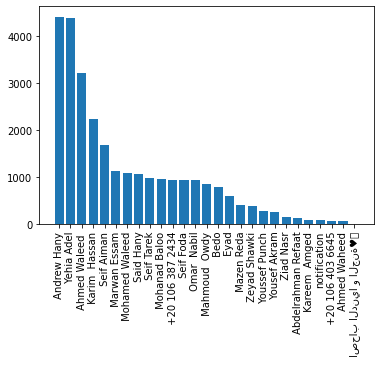

In [123]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')
plt.show()

**Most Active Users By Percentage**

In [124]:
df['user'].value_counts()/df.shape[0]*100

 Andrew Hany                15.800951
 Yehia Adel                 15.697280
 Ahmed Waleed               11.503950
 Karim  Hassan               8.014871
 Seif Aiman                  5.977192
 Marwan Essam                4.028885
 Mohamed Waleed              3.868016
 Said Hany                   3.778644
 Seif Tarek                  3.464055
 Mohanad Baloo               3.417581
 ‪+20 106 387 2434‬          3.363958
 Seif Foda                   3.324634
 Omar  Nabil                 3.313910
 Mahmoud  Owdy               3.013620
 Bedo                        2.831302
 Eyad                        2.116326
 Mazen Reda                  1.444250
 Zeyad Shawki                1.337004
 Youssef Punch               0.943767
 Yousef Akram                0.857970
 Ziad Nasr                   0.543381
 Abdelrahman Refaat          0.446859
 Kareem  Amged               0.260966
notification                 0.246666
 ‪+20 106 403 6645‬          0.225217
 Ahmed Waheed                0.175169
 اصحاب الدني

In [125]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index()

,index,user
0,Andrew Hany,15.80
1,Yehia Adel,15.70
2,Ahmed Waleed,11.50
3,Karim Hassan,8.01
4,Seif Aiman,5.98
5,Marwan Essam,4.03
6,Mohamed Waleed,3.87
7,Said Hany,3.78
8,Seif Tarek,3.46
9,Mohanad Baloo,3.42


In [126]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index' : 'name', 'user' : 'precent'})

,name,precent
0,Andrew Hany,15.80
1,Yehia Adel,15.70
2,Ahmed Waleed,11.50
3,Karim Hassan,8.01
4,Seif Aiman,5.98
5,Marwan Essam,4.03
6,Mohamed Waleed,3.87
7,Said Hany,3.78
8,Seif Tarek,3.46
9,Mohanad Baloo,3.42


**Plot Word Cloud**

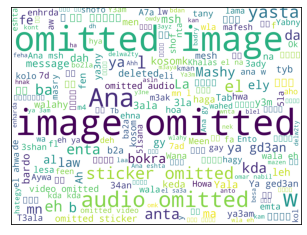

In [127]:
text = df['message'].str.cat(sep=" ")
text = arabic_reshaper.reshape(text)
wc = WordCloud(width=2000, height=1500, min_font_size=20, background_color='white')
df_wc = wc.generate(text)
plt.xticks([])
plt.yticks([])
plt.imshow(df_wc);

**Arabic and English Stopwords**

In [128]:
arabic_stopwords = stopwords.words('arabic')
english_stopwords = stopwords.words('english')

In [129]:
arabic_stopwords

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [130]:
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [131]:
temp_df = df[df['user'] != 'notification']

**Most Common Words**

In [132]:
clean_words = []
for message in temp_df['message']:
    for word in message.lower().split():
        if word not in arabic_stopwords and word not in english_stopwords:
            if word != 'omitted' and word != '\u200eimage' and word != '\u200esticker' and word != '\u200eaudio' and word != '\u200evideo' and word != '\u200e':
                clean_words.append(word)

In [133]:
most_common_words = pd.DataFrame(Counter(clean_words).most_common(20), columns=['Word', 'Count'])

In [134]:
most_common_words

,Word,Count
0,ana,2426
1,w,2015
2,ya,1775
3,el,1456
4,l,863
5,eh,844
6,yasta,658
7,kda,604
8,mn,571
9,msh,568


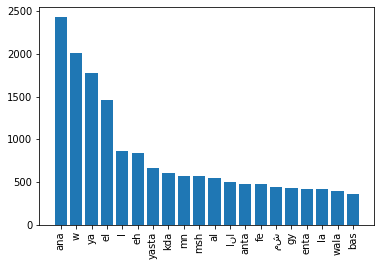

In [135]:
plt.bar(most_common_words['Word'], most_common_words['Count'])
plt.xticks(rotation='vertical')
plt.show()

**Extract the emojies**

In [136]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [137]:
emojis_df = pd.DataFrame(Counter(emojis).most_common(len(emojis)), columns=['Emoji', 'Count']).head()
emojis_df

,Emoji,Count
0,😂,8245
1,❤,641
2,♥,233
3,👍,76
4,😅,54


In [138]:
emojis_df['Emoji'][0]

'😂'

In [139]:
print(f"Most Used Emoijs: {emojis_df['Emoji'][0]} {emojis_df['Emoji'][1]} {emojis_df['Emoji'][2]}")

Most Used Emoijs: 😂 ❤ ♥


In [140]:
df.tail()

,message_date,user,message,year,month,day,hours,minutes,seconds
27968,2022-06-18 16:45:38,Yehia Adel,Ana 5las 3mlt hsabk w hhgz\n,2022,June,18,16,45,38
27969,2022-06-18 17:04:30,Yousef Akram,اللعب امتى يا جدعان حجزتو ؟\n,2022,June,18,17,4,30
27970,2022-06-18 18:13:35,Yehia Adel,Ell3b mn 11 ya gd3an\n,2022,June,18,18,13,35
27971,2022-06-18 18:17:40,Ahmed Waleed,فين\n,2022,June,18,18,17,40
27972,2022-06-19 18:17:07,Seif Aiman,Men hytfrg 3l match\n,2022,June,19,18,17,7


In [141]:
df['month_num'] = df['message_date'].dt.month
df.tail()

,message_date,user,message,year,month,day,hours,minutes,seconds,month_num
27968,2022-06-18 16:45:38,Yehia Adel,Ana 5las 3mlt hsabk w hhgz\n,2022,June,18,16,45,38,6
27969,2022-06-18 17:04:30,Yousef Akram,اللعب امتى يا جدعان حجزتو ؟\n,2022,June,18,17,4,30,6
27970,2022-06-18 18:13:35,Yehia Adel,Ell3b mn 11 ya gd3an\n,2022,June,18,18,13,35,6
27971,2022-06-18 18:17:40,Ahmed Waleed,فين\n,2022,June,18,18,17,40,6
27972,2022-06-19 18:17:07,Seif Aiman,Men hytfrg 3l match\n,2022,June,19,18,17,7,6


In [142]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [143]:
timeline

,year,month_num,month,message
0,2019,7,July,3
1,2020,3,March,871
2,2020,4,April,773
3,2020,5,May,1317
4,2020,6,June,372
5,2020,7,July,1095
6,2020,8,August,1453
7,2020,9,September,1737
8,2020,10,October,2122
9,2020,11,November,1714


In [144]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + '-' + str(timeline['year'][i]))
time

['July-2019',
 'March-2020',
 'April-2020',
 'May-2020',
 'June-2020',
 'July-2020',
 'August-2020',
 'September-2020',
 'October-2020',
 'November-2020',
 'December-2020',
 'January-2021',
 'February-2021',
 'March-2021',
 'April-2021',
 'May-2021',
 'June-2021',
 'July-2021',
 'August-2021',
 'September-2021',
 'October-2021',
 'November-2021',
 'December-2021',
 'January-2022',
 'February-2022',
 'March-2022',
 'April-2022',
 'May-2022',
 'June-2022']

In [145]:
timeline['time'] = time
timeline

,year,month_num,month,message,time
0,2019,7,July,3,July-2019
1,2020,3,March,871,March-2020
2,2020,4,April,773,April-2020
3,2020,5,May,1317,May-2020
4,2020,6,June,372,June-2020
5,2020,7,July,1095,July-2020
6,2020,8,August,1453,August-2020
7,2020,9,September,1737,September-2020
8,2020,10,October,2122,October-2020
9,2020,11,November,1714,November-2020


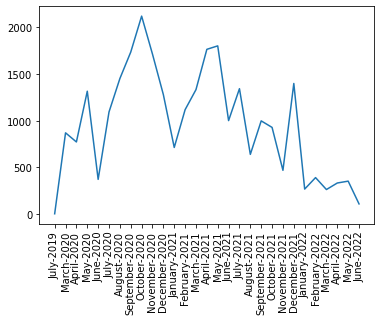

In [146]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical');

In [147]:
df.head()

,message_date,user,message,year,month,day,hours,minutes,seconds,month_num
0,2019-07-08 13:57:52,اصحاب الدنيا و الجنة♥️🌍,‎Messages and calls are end-to-end encrypted. ...,2019,July,8,13,57,52,7
1,2019-07-08 13:57:52,notification,‎Marwan Essam created this group\n,2019,July,8,13,57,52,7
2,2019-07-08 13:57:52,notification,‎You were added\n,2019,July,8,13,57,52,7
3,2020-03-05 18:47:50,Mazen Reda,Aywa mna m3rfsh hat3mloo ehh\n,2020,March,5,18,47,50,3
4,2020-03-05 18:53:24,Andrew Hany,Ana gy ana w kikis\n,2020,March,5,18,53,24,3


In [148]:
df['date'] = df['message_date'].dt.date

In [149]:
df.head()

,message_date,user,message,year,month,day,hours,minutes,seconds,month_num,date
0,2019-07-08 13:57:52,اصحاب الدنيا و الجنة♥️🌍,‎Messages and calls are end-to-end encrypted. ...,2019,July,8,13,57,52,7,2019-07-08
1,2019-07-08 13:57:52,notification,‎Marwan Essam created this group\n,2019,July,8,13,57,52,7,2019-07-08
2,2019-07-08 13:57:52,notification,‎You were added\n,2019,July,8,13,57,52,7,2019-07-08
3,2020-03-05 18:47:50,Mazen Reda,Aywa mna m3rfsh hat3mloo ehh\n,2020,March,5,18,47,50,3,2020-03-05
4,2020-03-05 18:53:24,Andrew Hany,Ana gy ana w kikis\n,2020,March,5,18,53,24,3,2020-03-05


In [150]:
daily_timeline = df.groupby('date').count()['message'].reset_index()

In [151]:
daily_timeline.head()

,date,message
0,2019-07-08,3
1,2020-03-05,7
2,2020-03-06,69
3,2020-03-07,8
4,2020-03-08,7


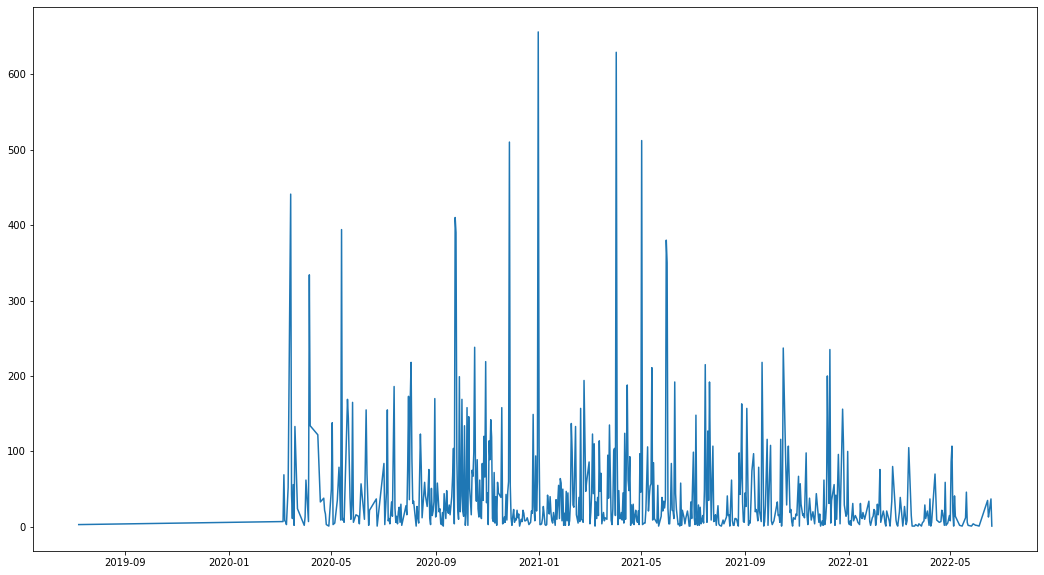

In [152]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['date'], daily_timeline['message'])

In [153]:
df['day_name'] = df['message_date'].dt.day_name()

In [154]:
df.head()

,message_date,user,message,year,month,day,hours,minutes,seconds,month_num,date,day_name
0,2019-07-08 13:57:52,اصحاب الدنيا و الجنة♥️🌍,‎Messages and calls are end-to-end encrypted. ...,2019,July,8,13,57,52,7,2019-07-08,Monday
1,2019-07-08 13:57:52,notification,‎Marwan Essam created this group\n,2019,July,8,13,57,52,7,2019-07-08,Monday
2,2019-07-08 13:57:52,notification,‎You were added\n,2019,July,8,13,57,52,7,2019-07-08,Monday
3,2020-03-05 18:47:50,Mazen Reda,Aywa mna m3rfsh hat3mloo ehh\n,2020,March,5,18,47,50,3,2020-03-05,Thursday
4,2020-03-05 18:53:24,Andrew Hany,Ana gy ana w kikis\n,2020,March,5,18,53,24,3,2020-03-05,Thursday


In [155]:
df['day_name'].value_counts().index

Index(['Friday', 'Thursday', 'Monday', 'Saturday', 'Tuesday', 'Wednesday',
       'Sunday'],
      dtype='object')

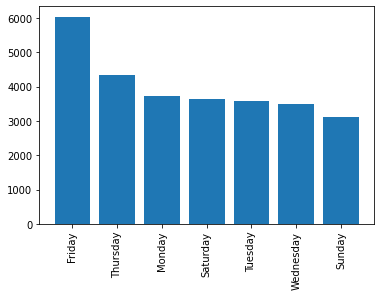

In [156]:
plt.bar(df['day_name'].value_counts().index, df['day_name'].value_counts().values)
plt.xticks(rotation = 'vertical');

In [157]:
df['month_name'] = df['message_date'].dt.month_name()

In [158]:
df.head()

,message_date,user,message,year,month,day,hours,minutes,seconds,month_num,date,day_name,month_name
0,2019-07-08 13:57:52,اصحاب الدنيا و الجنة♥️🌍,‎Messages and calls are end-to-end encrypted. ...,2019,July,8,13,57,52,7,2019-07-08,Monday,July
1,2019-07-08 13:57:52,notification,‎Marwan Essam created this group\n,2019,July,8,13,57,52,7,2019-07-08,Monday,July
2,2019-07-08 13:57:52,notification,‎You were added\n,2019,July,8,13,57,52,7,2019-07-08,Monday,July
3,2020-03-05 18:47:50,Mazen Reda,Aywa mna m3rfsh hat3mloo ehh\n,2020,March,5,18,47,50,3,2020-03-05,Thursday,March
4,2020-03-05 18:53:24,Andrew Hany,Ana gy ana w kikis\n,2020,March,5,18,53,24,3,2020-03-05,Thursday,March


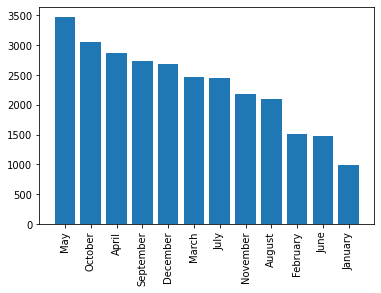

In [159]:
plt.bar(df['month_name'].value_counts().index, df['month_name'].value_counts().values)
plt.xticks(rotation = 'vertical');

In [160]:
most_hours = df.groupby('hours').count()['message'].reset_index()

In [161]:
most_hours

,hours,message
0,0,1169
1,1,1420
2,2,899
3,3,1133
4,4,353
5,5,197
6,6,99
7,7,33
8,8,179
9,9,124


In [162]:
most_hours.replace(to_replace=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],value=['0AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM'],inplace=True)

In [163]:
most_hours.replace(to_replace=[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],value=['12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM'],inplace=True)

In [164]:
most_hours

,hours,message
0,0AM,1169
1,1AM,1420
2,2AM,899
3,3AM,1133
4,4AM,353
5,5AM,197
6,6AM,99
7,7AM,33
8,8AM,179
9,9AM,124


In [165]:
am = most_hours.iloc[0:12]
pm = most_hours.iloc[12:24]

In [166]:
am

,hours,message
0,0AM,1169
1,1AM,1420
2,2AM,899
3,3AM,1133
4,4AM,353
5,5AM,197
6,6AM,99
7,7AM,33
8,8AM,179
9,9AM,124


In [167]:
pm

,hours,message
12,12PM,641
13,1PM,757
14,2PM,1608
15,3PM,2071
16,4PM,3362
17,5PM,3118
18,6PM,3441
19,7PM,2984
20,8PM,1165
21,9PM,1431


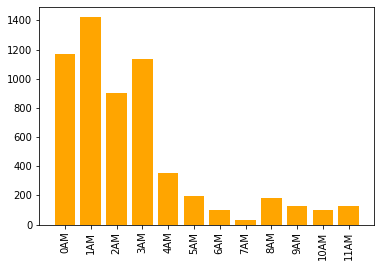

In [168]:
plt.bar(am['hours'], am['message'], color='orange')
plt.xticks(rotation='vertical');

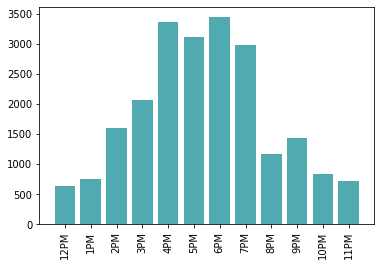

In [169]:
plt.bar(pm['hours'], pm['message'], color='#50AAB0')
plt.xticks(rotation='vertical');